# 7COM1074 Applied Data Science and Analytics
# Coursework 2 - Data Science Campaign.

Provided is this jupyter notebook. Contained are all instructions necessary to complete the assignment.

This assignment is weighted with 30% of the total marks you can score in this module.

## What to submit
You must submit two files:
1. this notebook, completed, in .ipynb format.
2. This notebook, completed, in .html format. 

Use File -> download as... -> HTML in the jupyter notebook menu bar to save this notebook in html format.

## Marking criteria 
A total of 100 marks can be obtained. 10 marks are obtained when submitting a notebook that runs without errors on an anaconda installation such as installed on the UH practical machines. The remaining 90 marks are distributed as indicated in the tasks.

**Only answers with correct code will be marked. Any parts that do not run because of coding errors will receive zero marks. This includes cells that do not run because previous cells contained errors. Please test your notebook before submitting.** You can use "Kernel" -> "Restart & Run All" in the jupyter notebook menu bar. 

## Problem statement
You will work on a a dataset about diabetes hospital re-admittance. The dataset is available via canvas as part of this assignment. [Diabetes](https://www.niddk.nih.gov/health-information/diabetes) is the condition when the body loses its ability to process glucose. It is often associated with overconsumption of food, and obesity. But there are also genetic factors that can cause the disease.  

The dataset is a CSV file. 

It contains seven features. It also contains one dependent variable, 'Outcome'.

### Task 1 - Load the data (5 marks)
Use pandas to load the provided csv file. 

Use the `DataFrame.head` command to show the first 10 rows of the data set. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler

##############################################################################

df = pd.read_csv('diabetes_assignment.csv')
df.head(10)

,no. pregnancies,blood glucose level,blood pressure,thickness of skin,insulin level,body mass index,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
5,5,116,74,0,0,25.6,30,0
6,3,78,50,32,88,31.0,26,1
7,10,115,0,0,0,35.3,29,0
8,2,197,70,45,543,30.5,53,1
9,8,125,96,0,0,0.0,54,1


### Task 2 - Normalisation and PCA (20 marks)
Perform a PCA on the data set. Perform the PCA on the correlation matrix, not the covariance matrix. Exclude the dependent variable from processing. The result should contain the maximum number of Principal Components possible. 

Make a DataFrame that contains the result of the PCA in the first *n* columns, *n* being the number of Principal Components. Columns should be named "PC 1" to "PC *n*".
The last column of the data frame should contain the unprocessed dependent variable. Name the column according to the dependent variable. 

Use the `DataFrame.head` function to display the 10 first rows of the dataset. 



In [2]:
columns = df[['no. pregnancies', 'blood glucose level', 'blood pressure',
            'thickness of skin', 'insulin level', 'body mass index', 'Age']]
variable = df['Outcome']

##############################################################################

sc = StandardScaler(with_mean=False, with_std=True)
scf = sc.fit(columns)
scaled_df = scf.transform(columns)
print('the shape of normalized data =', scaled_df.shape)

#############################################################################

c_df = np.corrcoef(scaled_df.T)

the shape of normalized data = (768, 7)


In [3]:
eigvals, eigvecs = np.linalg.eig(c_df)

#############################################################################

cx = np.matmul(eigvecs, scaled_df.T)
cx = np.vstack((cx,variable)).T

#############################################################################

c = ("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "Outcome")
PCA_df = pd.DataFrame(data=cx, columns=c)
PCA_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Outcome
0,4.869239,6.810112,0.878954,-1.687093,-1.236098,-1.902216,-0.859396,1.0
1,2.572600,5.071602,-0.229697,-1.332840,-1.055538,-2.024642,-1.043909,0.0
2,5.616938,5.174398,0.436943,-1.016189,-0.374229,-1.831836,1.584098,1.0
3,2.201482,4.863550,0.009679,-0.848266,-0.971583,-2.805093,-0.340737,0.0
4,3.432890,5.379789,1.621481,-0.884942,-3.109893,-3.600953,-0.799260,1.0
5,4.153354,4.963107,-0.487637,-0.458607,-0.048144,-2.175018,0.171443,0.0
6,2.184952,5.054269,0.875171,-0.489364,-1.333055,-2.130958,-0.882702,1.0
7,4.678270,3.862195,2.075073,1.646078,-1.920178,-0.633983,0.164560,0.0
8,4.476776,6.200694,3.885760,-3.351089,-0.770301,-5.610620,-0.300812,1.0
9,5.227542,4.701549,-0.280419,-2.818459,2.875911,-0.977741,-0.104170,1.0


### Task 3 - PCA Scatter plot and interpretation (15 marks)

Make a scatter plot of the first two principal components. Use small dots as markers. Color the dots according to the dependent variable. Use different colors for all discrete values of the dependent variable. Add a legend to the plot that explains which color is associated with which value of the dependent variable. Label the axes accordingly.

Interpret the findings: By visual inspection, which principal component gives a better separation of the dependent variable? Justify your answer. Three sentences maximum. 



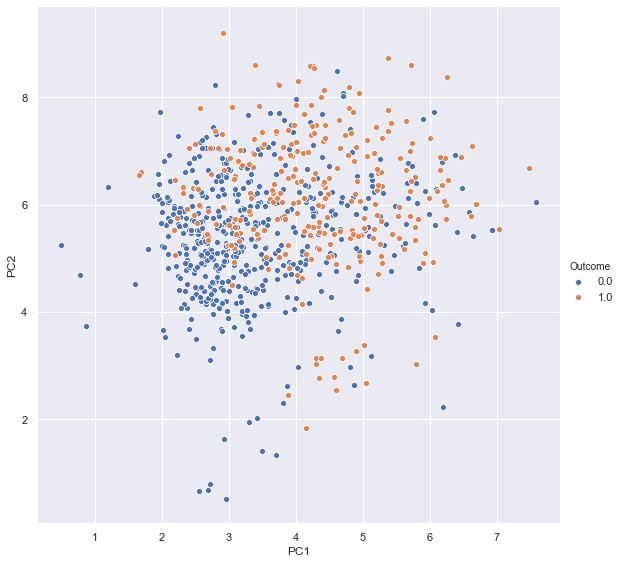

In [4]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('darkgrid')
g = sns.FacetGrid(PCA_df, hue="Outcome", height = 8)
g.map(sns.scatterplot, 'PC1', 'PC2').add_legend()
plt.show()

**Interpretation**: It is not possible to draw a boundary line between the outcomes in the first two components. The points are scattered in the entire region of range (8,9).

### Task 4 - Covariance/correlation matrix and interpretation (20 marks)
Plot the covariance/correlation matrix as an image. 
Use a divergent colormap and center it on zero. 
Display a colorbar. 
Label each row and column according to the feature they represent, i.e. set the xticklabels and yticklabels accordingly. 
Rotate the labels on the columns by 90 degress to make sure they are legible. 

Interpret the result: Name the three pairs of features with the highest correlation. 

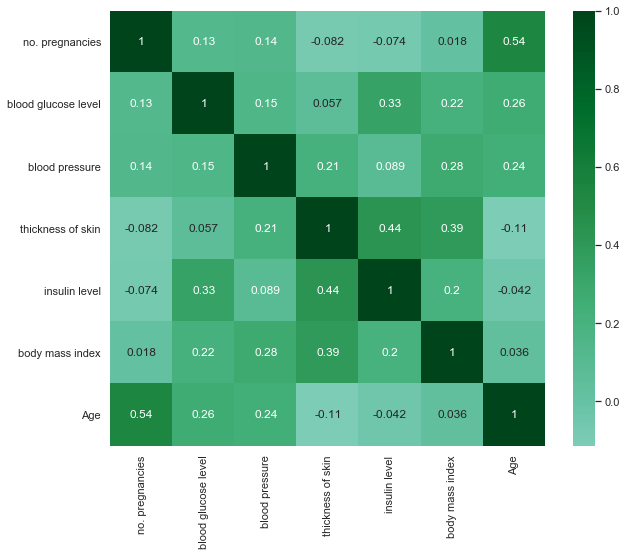

In [5]:
sns.set(rc={'figure.figsize':(10,8)})
c = ('no. pregnancies', 'blood glucose level', 'blood pressure','thickness of skin', 'insulin level', 'body mass index', 'Age')
with sns.axes_style("darkgrid"):
    sns.heatmap(c_df, cmap='BuGn',
                annot=True, center=0,
                square=True, xticklabels=c,
                yticklabels=c)
plt.show()

**Interpretation:** 

Most correlated feature pairs:


1. age, no. pregnancies


2. insulin level, thickness of skin


3. body mass index, thickness of skin

### Task 5 - component matrix and interpretation (20 marks)

Plot the PCA component matrix as an image. Use a diverging colormap. Center it on zero. Display a colorbar. Use labels for rows and columns to indicate which PC or feature the row or column refers to. Make sure all labels are legible. 

Interpret the component matrix, taking your observation from the scatter plot into account. Which features are most likely to be correlated with the outcome? Justify your answer. Five sentences maximum.



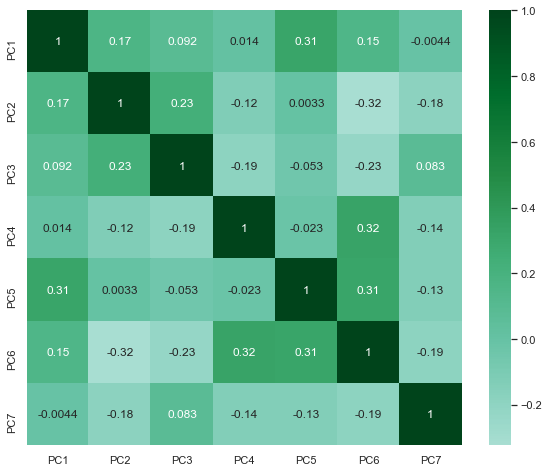

In [6]:
cols = PCA_df[["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"]]

#############################################################################

c = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"]
corr_pca = np.corrcoef(cols.T)

#############################################################################

sns.set(rc={'figure.figsize':(10,8)})
with sns.axes_style("darkgrid"):
    ax = sns.heatmap(corr_pca, cmap='BuGn',
                     annot=True, center=0,
                     square=True, xticklabels=c,
                     yticklabels=c)
plt.show()

**Interpretation:** 

the most correlated components are PC6 - PC4. the correlation between first two principal components is low, however, a correlation still exists between these two components. The components with correlation 1 can be ignored since it's the measure of same components.

### Task 6 - Scree plot and interpretation (10 marks)

Plot the explained variance ratio against the number of Principal Components ("scree plot"). Use 'x' as a marker and a dashed line, both colored black. Label the axes accordingly. Set the y-axis limit such that it covers the whole range of values, starting at zero.  

Interpret the findings: What fraction of the total variance do the first two PCs explain? How many PCs are required to explain 95% of the variance? Feel free to use extra code to provide exact answers. 



In [7]:
var = []
for i in eigvals:
     var.append((i/sum(eigvals))*100)

In [8]:
exp_var = var/np.sum(var)
cum_var_ratio = np.cumsum(exp_var)*100

In [9]:
cum_var_ratio

array([ 28.72861358,  53.23278915,  67.47444894,  78.39470992,
        88.17043793,  93.94887651, 100.        ])

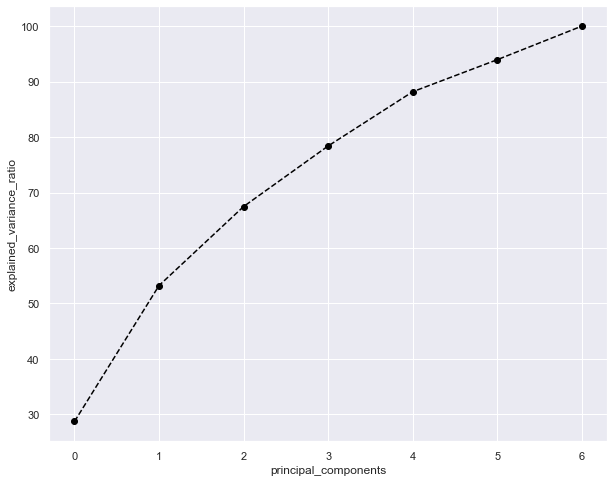

In [10]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('darkgrid')
plt.plot(cum_var_ratio, color = 'black', marker= 'o', linestyle='dashed')
plt.xlabel('principal_components')
plt.ylabel('explained_variance_ratio')
plt.show()

**Interpretation**: 

The first two principal components explain *53* % of the variance.


*7* principal components are required to explain 95 % of the total variance. 